In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# Create an engine to a SQLite database file called `surfsup.sqlite`
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# Reflect an existing database into a new model and then reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session from Python to the database
session = Session(engine)

In [11]:
engine.execute("SELECT * FROM measurement LIMIT 10").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [12]:
engine.execute("SELECT * FROM station LIMIT 10").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [ ]:
# from sqlalchemy.ext.automap import automap_base

# # Reflect Database into ORM class
# Base = automap_base()
# Base.prepare(engine, reflect=True)
# Measurement = Base.classes.measurement
# Station = Base.classes.station

In [13]:
# Query all tobs values
results = session.query(Measurement.tobs).all()

# Convert list of tuples into normal list
tobs_values = list(np.ravel(results))
tobs_values

[65.0,
 63.0,
 74.0,
 76.0,
 73.0,
 70.0,
 64.0,
 68.0,
 73.0,
 64.0,
 61.0,
 66.0,
 65.0,
 68.0,
 64.0,
 72.0,
 66.0,
 66.0,
 69.0,
 67.0,
 67.0,
 71.0,
 67.0,
 76.0,
 68.0,
 72.0,
 70.0,
 67.0,
 66.0,
 67.0,
 69.0,
 67.0,
 67.0,
 64.0,
 69.0,
 73.0,
 73.0,
 69.0,
 69.0,
 69.0,
 71.0,
 61.0,
 69.0,
 63.0,
 64.0,
 65.0,
 67.0,
 68.0,
 65.0,
 76.0,
 75.0,
 66.0,
 70.0,
 72.0,
 73.0,
 70.0,
 71.0,
 72.0,
 72.0,
 69.0,
 70.0,
 73.0,
 72.0,
 73.0,
 70.0,
 71.0,
 68.0,
 70.0,
 72.0,
 69.0,
 68.0,
 74.0,
 72.0,
 72.0,
 73.0,
 74.0,
 73.0,
 73.0,
 74.0,
 74.0,
 74.0,
 71.0,
 72.0,
 75.0,
 75.0,
 75.0,
 75.0,
 73.0,
 73.0,
 71.0,
 71.0,
 68.0,
 70.0,
 71.0,
 74.0,
 71.0,
 75.0,
 76.0,
 75.0,
 75.0,
 76.0,
 76.0,
 76.0,
 77.0,
 77.0,
 73.0,
 74.0,
 76.0,
 76.0,
 80.0,
 74.0,
 77.0,
 77.0,
 76.0,
 77.0,
 78.0,
 78.0,
 75.0,
 73.0,
 77.0,
 76.0,
 77.0,
 77.0,
 78.0,
 75.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 77.0,
 77.0,
 77.0,
 78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
end_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print('End date: ' + str(end_date))
print('Last year: ' + str(last_year))

End date: ('2017-08-23',)
Last year: 2016-08-23


In [35]:
precip_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > last_year).order_by(Measurement.date).all()
df = pd.DataFrame(precip_scores)
df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


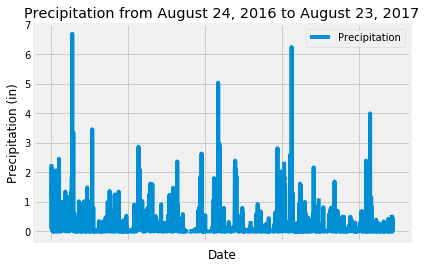

In [36]:
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
df.sort_values(['date'],ascending=True)
df.plot("date", "prcp")
plt.xlabel("Date")
plt.ylabel("Precipitation (in)")
plt.title("Precipitation August 24, 2016 - August 23, 2017")
plt.legend(["Precipitation"])
plt.show()

In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [39]:
# Design a query to show how many stations are available in this dataset
total_stations = session.query(Station.station).count()
print('Number of stations in dataset: ' + str(total_stations))

Number of stations in dataset: 9


In [52]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
print('Active stations include: ' + str(active_stations))

Active stations include: [('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [42]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station
most_active = active_stations[0][0]
active_data = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.station == most_active).all()
print(str(most_active) + ' is the most active station.')
print(str(most_active) + ' min, avg, and max temps: ' + str(active_data))

USC00519281 is the most active station.
USC00519281 min, avg, and max temps: [(54.0, 71.66378066378067, 85.0)]


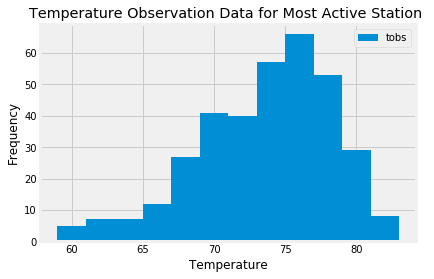

In [44]:
# Choose the station with the highest number of temperature observations
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_temps = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == most_active).filter(Measurement.date >= last_year).all()
df_temps = pd.DataFrame(most_temps)
df_temps.set_index("station")
# df_temps.head()

df_temps.plot.hist(by="station", bins=12)
plt.title("Temperature Observation Data for Most Active Station ")
plt.xlabel("Temperature")
plt.show()

In [45]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [46]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates
trip_temps = calc_temps("2016-08-24", "2016-08-31")
trip_temps

[(71.0, 78.11538461538461, 84.0)]

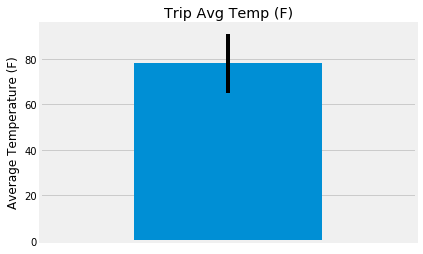

In [47]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
df_trip_temp = pd.DataFrame(trip_temps, columns=["Min Temp", "Avg Temp", "Max Temp"])
temp_avg= df_trip_temp["Avg Temp"]
temp_diff = df_trip_temp["Max Temp"] - df_trip_temp["Min Temp"]
temp_avg.plot(kind="bar", yerr=temp_diff)
plt.title("Trip Avg Temp (F)")
plt.ylabel("Average Temperature (F)")
plt.xticks([])
plt.show()

In [48]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
date_arrive = dt.date(2016, 8, 24)
date_leave = dt.date(2016, 8, 31)
trip_rainfall = session.query(Measurement.station, func.sum(Measurement.prcp), Station.name, Station.elevation, Station.latitude, Station.longitude).filter(Measurement.station == Station.station).filter(Measurement.date >= date_arrive).filter(Measurement.date <= date_leave).group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
print(trip_rainfall)

[('USC00516128', 7.04, 'MANOA LYON ARBO 785.2, HI US', 152.4, 21.3331, -157.8025), ('USC00519281', 3.5300000000000002, 'WAIHEE 837.5, HI US', 32.9, 21.45167, -157.84888999999998), ('USC00513117', 2.85, 'KANEOHE 838.1, HI US', 14.6, 21.4234, -157.8015), ('USC00514830', 2.5, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 7.0, 21.5213, -157.8374), ('USC00519523', 1.8199999999999998, 'WAIMANALO EXPERIMENTAL FARM, HI US', 19.5, 21.33556, -157.71139), ('USC00519397', 0.30000000000000004, 'WAIKIKI 717.2, HI US', 3.0, 21.2716, -157.8168), ('USC00517948', 0.06, 'PEARL CITY, HI US', 11.9, 21.3934, -157.9751)]
